In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def normalize(X) -> tuple:
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    print(mu, sigma)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [3]:
def cost_function(x, y, w, b) -> float:
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        cost += (f_wb - y[i]) ** 2
    cost = cost / (2.0 * m)
    return cost

In [4]:
def gradient_function(x, y, w, b) -> tuple:
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = np.dot(x[i], w) + b
        for j in range(n):
            dj_dw[j] += (err - y[i]) * x[i, j]
        dj_db += err - y[i]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [5]:
def gradient_descent(x, y, w, b, alpha=1e-1, iters=100000) -> tuple:
    cost_hist = np.zeros(iters)
    for i in range(iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost_hist[i] = cost_function(x, y, w, b)
        if i % 1000 == 0:
            print('i=', i, 'Cost: ', cost_hist[i ], 'w: ', w, 'b: ', b)
    return w, b, cost_hist

In [6]:
X = np.arange(0, 30 ,1)
y = X**2                    # notice y is given values before X is reshaped
X = X.reshape(-1, 1)        # notice X is reshaped because each element is considered a training example with only one feature
X = np.c_[X, X**2, X**3]    # performing feature engineering to create more features
X, X_mu, X_sigma = normalize(X)            # new values to be predicted must be normalized as well

w = np.zeros(X.shape[1])
b = 0

w_final, b_final, cost_hist = gradient_descent(X, y, w, b, alpha=1e-1, iters=100000)
print('Final values of weights and bias are: ', w_final, b_final)

[  14.5         285.16666667 6307.5       ] [   8.65544145  259.76901064 7253.49232554]
i= 0 Cost:  49921.12111223703 w:  [25.1007802  25.97690106 25.60916406] b:  28.51666666666667
i= 1000 Cost:  21.34429004350496 w:  [ 58.58862528 111.78535814  92.49395906] b:  285.16666666666646
i= 2000 Cost:  16.5903488244438 w:  [ 51.6509974  129.30236956  81.54773399] b:  285.16666666666646
i= 3000 Cost:  12.895237176276762 w:  [ 45.53712599 144.74556063  71.89501984] b:  285.16666666666646
i= 4000 Cost:  10.023125106774568 w:  [ 40.14694709 158.36075832  63.3848864 ] b:  285.16666666666646
i= 5000 Cost:  7.790708734762506 w:  [ 35.39479767 170.36434022  55.88208798] b:  285.16666666666646
i= 6000 Cost:  6.055510825548994 w:  [ 31.20515489 180.9470715   49.26738745] b:  285.16666666666646
i= 7000 Cost:  4.706787611597118 w:  [ 27.51143545 190.27713667  43.43566166] b:  285.16666666666646
i= 8000 Cost:  3.658460905926179 w:  [ 24.25493747 198.50281241  38.29423076] b:  285.16666666666646
i= 9000 C

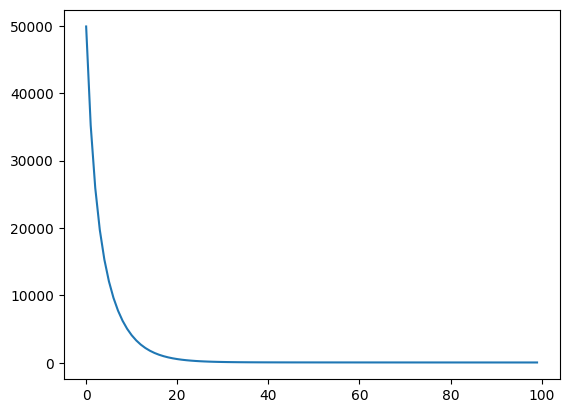

In [7]:
def plot_cost(cost_hist):
    """
    Plot the cost function
    :param cost_hist: 
    :return: 
    """
    plt.plot(cost_hist[:100])
    plt.show()
    
plot_cost(cost_hist)

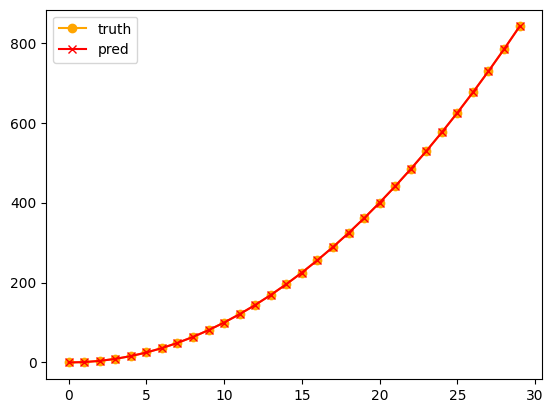

In [8]:
def plot_result(X, y, w, b):
    n = len(y)
    y_pred = np.array([])
    for i in range(n):
        ne = np.dot(w, X[i]) + b
        y_pred = np.append(y_pred, ne)
        
    plt.plot(y, color='orange', label='truth', marker='o')
    plt.plot(y_pred, color='red', label='pred', marker='x')
    plt.legend()
    plt.show()
    
plot_result(X, y, w_final, b_final)

In [9]:
def prediction(X, w, b):
    return np.dot(X, w) + b

X_hat = np.array([40])              # Predict for new value
X_hat_feat_engg = np.c_[X_hat, X_hat**2, X_hat**3]
X_hat_norm = (X_hat_feat_engg - X_mu) / X_sigma
print(prediction(X_hat_norm, w_final, b_final))

[1600.00061037]
